In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context = "notebook", palette = "Spectral", style = 'darkgrid', font_scale = 1.5, color_codes = True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [2]:
ad_data = pd.read_csv(r"C:\Users\asus\Downloads\Advertising.csv")

In [3]:
ad_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


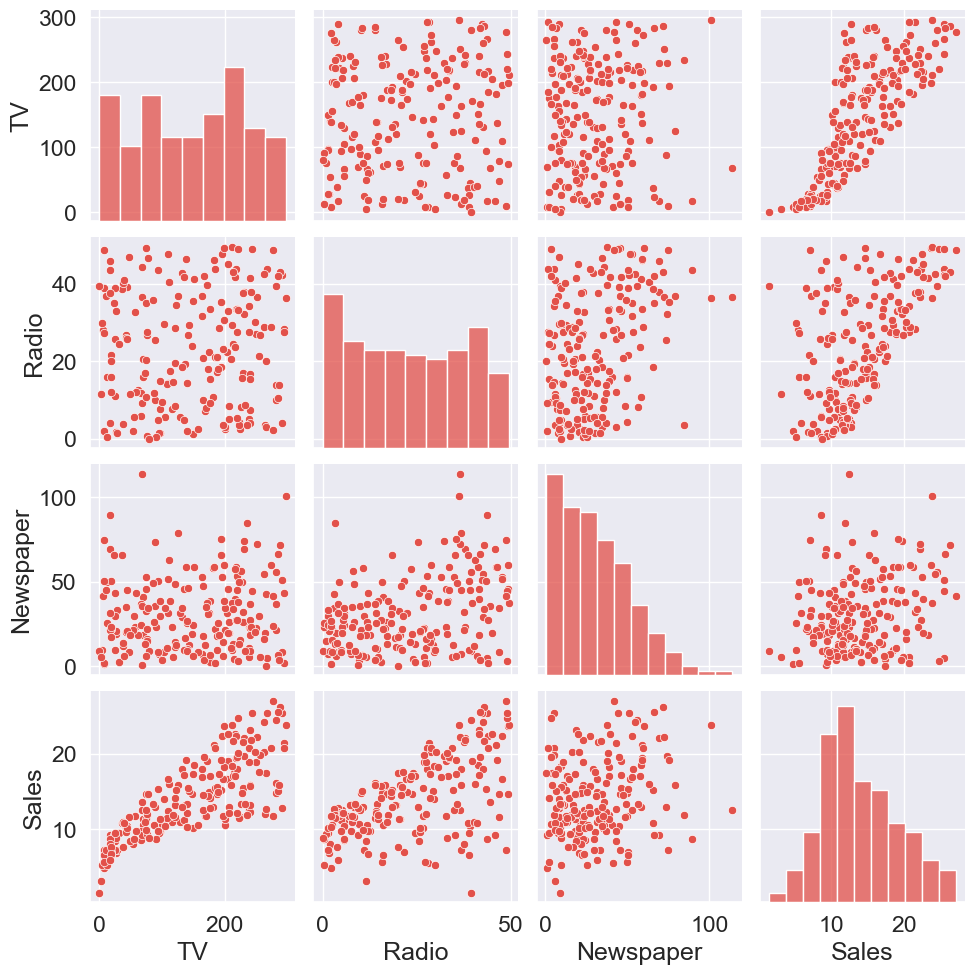

In [6]:
p = sns.pairplot(ad_data)

## Assumptions for Linear Regression:

###  1. Linearity:

Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable.

A tip is to remember to always see the plots from where the dependent variable is on the y axis. Though it wouldn't vary the shape much but that's how linear regression's intuition is, to put the dependent variable as y and independents as x(s).

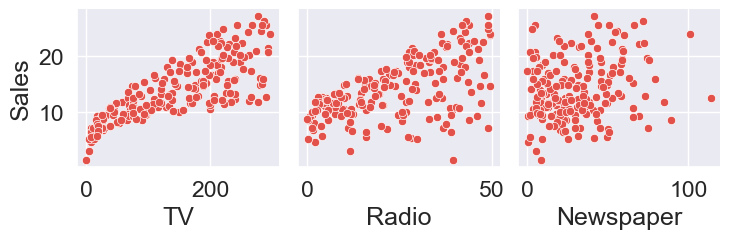

In [7]:
# visualize the relationship between the features and the response using scatterplots

p = sns.pairplot(ad_data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales')
plt.show()


By looking at the plots we can see that with the Sales variable the none of the independent variables form an accurately linear shape but TV and Radio do still better than Newspaper which seems to hardly have any specific shape. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

#### Fitting the linear model:

In [8]:
x = ad_data.drop(["Sales"], axis = 1)
y = ad_data.Sales

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"Coefficient of Determination: {r_sq}")

print(f"intercept: {model.intercept_}")


print(f"coefficients: {model.coef_}")

Coefficient of Determination: 0.8972106381789522
intercept: 2.9388893694594085
coefficients: [ 0.04576465  0.18853002 -0.00103749]


In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() #Data normalized x-mu/sigma(sd)
X = sc.fit_transform(x)


In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x,y)
y_pred = regr.predict(x)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"Coefficient of Determination: {r_sq}")

print(f"intercept: {model.intercept_}")


print(f"coefficients: {model.coef_}")

Coefficient of Determination: 0.8972106381789522
intercept: 2.9388893694594085
coefficients: [ 0.04576465  0.18853002 -0.00103749]


### 2. Mean of Residuals:

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out

In [12]:
residuals = y.values - y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.5987211554602255e-15


#### 
Very close to zero so all good here.

### 3.Check for Homoscedasticity:
Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

#### 

##### Detecting Heteroscedasticity:
Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

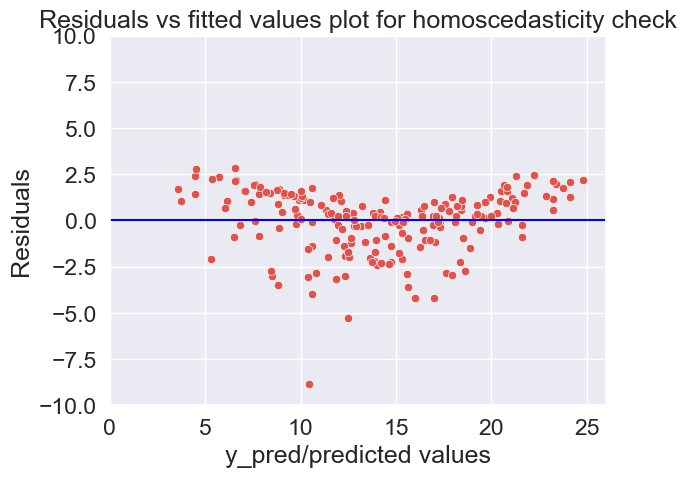

In [13]:
p = sns.scatterplot(y_pred, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26], [0,0], color = 'blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

##### Now we will be applying tests.
A tip is to keep in mind that if we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis. Remember, a researcher or data scientist would always aim to reject the null hypothesis.

#### Goldfeld Quandt Test:
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis(H0): Error terms are homoscedastic.

Alternative Hypothesis(H1): Error terms are heteroscedastic.

In [14]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x)
lzip(name, test)

[('F statistic', 1.3444110321318348), ('p-value', 0.07338571632410308)]

#### 
Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. 

### 4. Check for Normality of error terms/residuals:

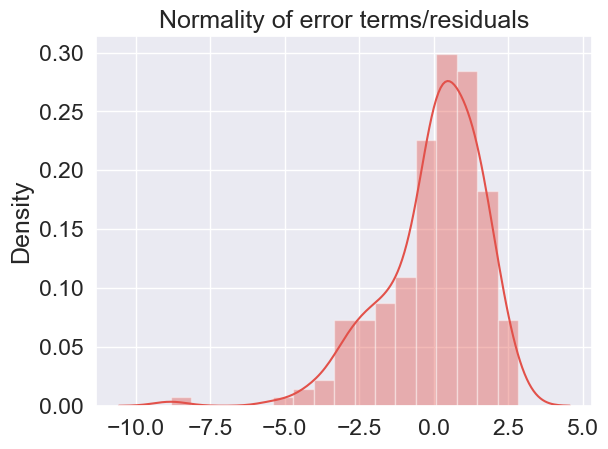

In [15]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.show()

#### 
The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

### 5. No autocorrelation of residuals

When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.

In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.

There should not be autocorrelation in the data so the error terms should not form any pattern.

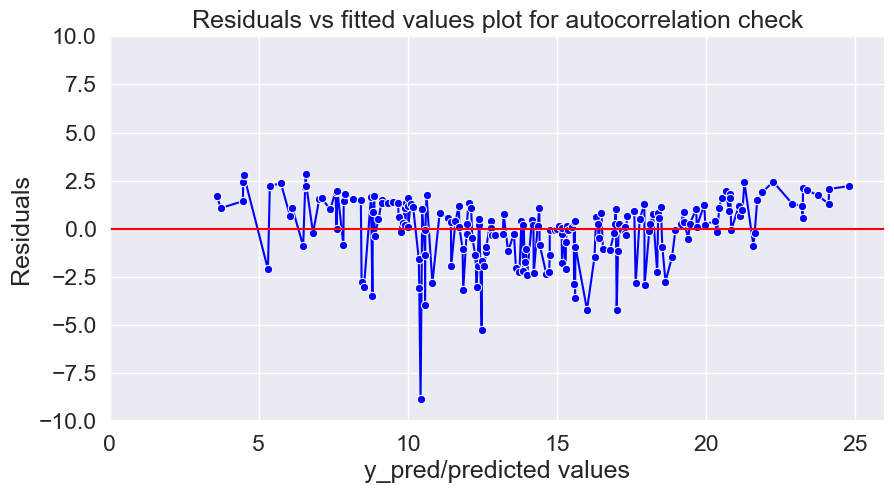

In [16]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')
plt.show()

##### Durbin-Watson Test:


Null Hypothesis: Autocorrelation is absent.

Alternative Hypothesis: Autocorrelation is present.

In [17]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
dw_statistic

2.083648405294408

#### 
Since dw_statistics is less than 1.55 we accept the null hypothesis that error terms are not autocorrelated.

In [18]:
import statsmodels.api as sm

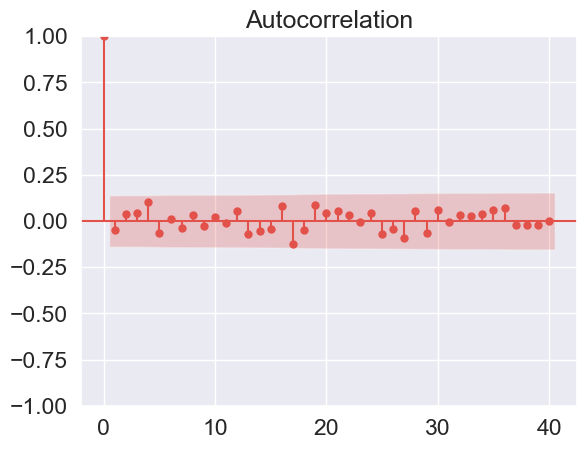

In [19]:
sm.graphics.tsa.plot_acf(residuals, lags = 40)
plt.show()

#### 
The results show signs of autocorelation since there are spikes outside the red confidence interval region. This could be a factor of seasonality in the data.

### 6. No perfect multicollinearity:
In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

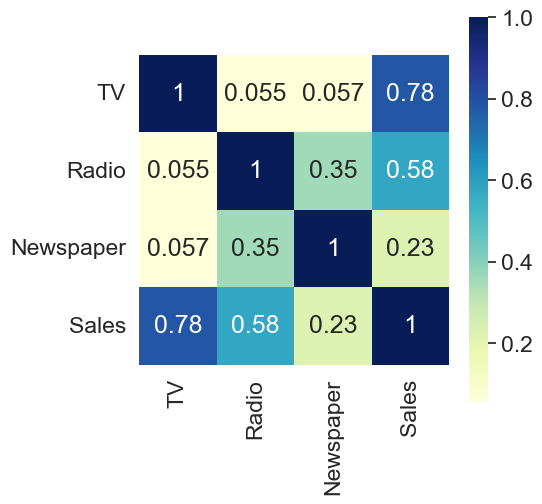

In [20]:
plt.figure(figsize = (5,5))
sns.heatmap(ad_data.corr(), annot = True, cmap = 'YlGnBu', square = True)
plt.show()

#### 
Look for correlation of rows where the dependent variable (Sales in this case) is not involved because if a variable is correlated with the dependent variable then this would be a good sign for our model. Correlation within dependent variables is what we need to look for and avoid. This data doesn't contain perfect multicollinearity among independent variables.

In [21]:
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
f_statistic, p_value = f_regression(x, y)

# Create an ANOVA table
anova_table = pd.DataFrame({'Variable': ['TV','Radio','Newspaper'],'Coefficients' : model.coef_, 'F-Statistic': f_statistic, 'P-Value': p_value})
print(anova_table)

    Variable  Coefficients  F-Statistic       P-Value
0         TV      0.045765   312.144994  1.467390e-42
1      Radio      0.188530    98.421588  4.354966e-19
2  Newspaper     -0.001037    10.887299  1.148196e-03


In [22]:
mean_absolute_error(y, y_pred)

1.252011229687068

In [23]:
mean_squared_error(y, y_pred)

2.784126314510936

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
X = rf_tree.fit(x,y)
rf_tree_y_pred = rf_tree.predict(x)
print("Accuracy: {}".format(rf_tree.score(x,y)))
print("R squared: {}".format(r2_score(y_true=y,y_pred=rf_tree_y_pred)))

Accuracy: 0.9973989761680441
R squared: 0.9973989761680441


In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'ad_data' contains your DataFrame with columns 'TV', 'Radio', 'Newspaper', and 'Sales'
# Create a formula for the multiple linear regression
formula = 'Sales ~ TV + Radio + Newspaper'

# Fit the OLS (Ordinary Least Squares) model
model = ols(formula, data=ad_data).fit()

# Generate the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df            F        PR(>F)
TV         3058.010016    1.0  1076.405837  1.509960e-81
Radio      1361.736549    1.0   479.325170  1.505339e-54
Newspaper     0.088717    1.0     0.031228  8.599151e-01
Residual    556.825263  196.0          NaN           NaN
